In [1]:
%matplotlib inline
import plot_helpers as ph
from matplotlib import pyplot as plt

In [2]:
fairgp_files_race = [
    ('../results/ICML/propublica/gpyt500_eqopp_tuning_race.csv', ''),
]
def label_change(label):
    parts = label.split('_')
    #mode = parts[-1]
    in_True = parts[4] == "True"
    tnr = parts[6]
    if not in_True and tnr != "0.74":
        return
    if in_True and tnr != "0.71":
        return
    optional_star = "*" if in_True else ""
    with_s = ", use $s$" if in_True else ""
    #return f"FairGPparity{optional_star}", in_True
    #return "average" if mode == "True" else mode, True
    num = label.split('_')[-1]
    return f"$TPR_t={num}${with_s}", not in_True

fairgp_race = ph.parse_all(fairgp_files_race, label_change)

In [3]:
fairgp_files_sex = [
    ('../results/ICML/propublica/gpyt500_eqopp_tuning_sex.csv', ''),
]
def label_change(label):
    parts = label.split('_')
    #mode = parts[-1]
    in_True = parts[4] == "True"
    tnr = parts[6]
    if not in_True and tnr != "0.77":
        return
    if in_True and tnr != "0.72":
        return
    optional_star = "*" if in_True else ""
    with_s = ", use $s$" if in_True else ""
    #return f"FairGPparity{optional_star}", in_True
    #return "average" if mode == "True" else mode, True
    num = label.split('_')[-1]
    return f"$TPR_t={num}${with_s}", not in_True

fairgp_sex = ph.parse_all(fairgp_files_sex, label_change)

In [4]:
fairgp = fairgp_race + fairgp_sex

In [5]:
fairgp = ph.choose_entries(fairgp, [0, 5, 1, 6, 2, 7, 3, 8, 4, 9])
#baselines = ph.choose_entries(baselines, [1, 0])

In [9]:
def tpr0_vs_tpr1(plot, legend, sens, swap_axes, *data):
    ms = 4
    xaxis = (f'0-TPR-{sens}', '$TPR_{s=0}$')
    yaxis = (f'1-TPR-{sens}', '$TPR_{s=1}$')
    if swap_axes:
        temp = xaxis
        xaxis = yaxis
        yaxis = temp
    legends = []
    startindex = 0

    plot.plot([0.0, 1.0], [0.0, 1.0], 'k--', label="perfect fairness" if legend is not None else None)
    for data_structure in data:
        legends += [ph.scatter(plot, data_structure, xaxis, yaxis, legend=legend, startindex=startindex, markersize=ms)]
        startindex += len(data_structure.entries) // 2
    if legend is not None:
        return legends

In [7]:
def tpr_vs_tnr(plot, do_legend, *data):
    ms = 4
    xaxis = ('TPR', 'TPR')
    yaxis = ('TNR', 'TNR')
    legends = []
    startindex = 0
    legend = "outside" if do_legend else None

    for data_structure in data:
        legends += [ph.scatter(plot, data_structure, xaxis, yaxis, legend=legend, startindex=startindex, markersize=ms)]
        startindex += len(data_structure.entries) // 2
    if do_legend:
        return legends

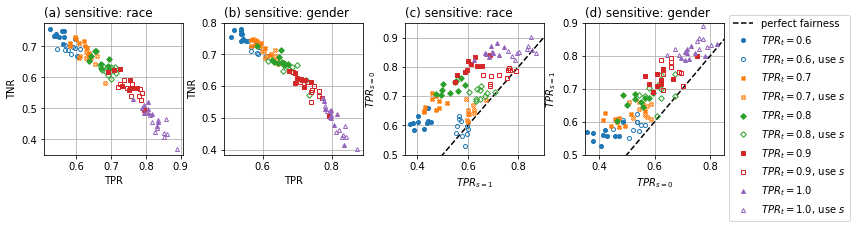

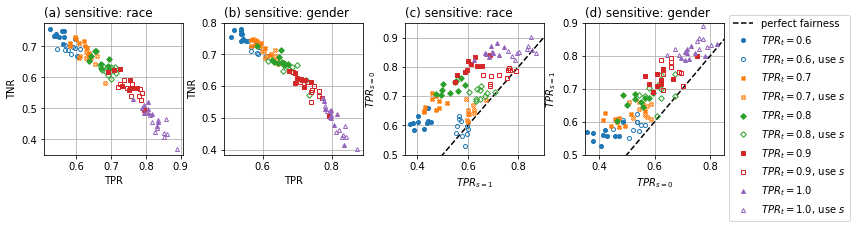

In [11]:
fig, plots = plt.subplots(ncols=4, figsize=(12, 2.2))

tpr_vs_tnr(plots[0], False, fairgp[0])
plots[0].set_title('(a) sensitive: race', loc='left')

tpr_vs_tnr(plots[1], False, fairgp[1])
plots[1].set_title('(b) sensitive: gender', loc='left')

tpr0_vs_tpr1(plots[2], None, 'race', True, fairgp[0])
plots[2].set_title('(c) sensitive: race', loc='left')
plots[2].set_ylim(0.5, 0.95)
plots[2].set_xlim(0.35, 0.9)

legends = tpr0_vs_tpr1(plots[3], ("outside", 1.1), 'sex', False, fairgp[1])
plots[3].set_title('(d) sensitive: gender', loc='left')
plots[3].set_ylim(0.5, 0.9)
plots[3].set_xlim(0.35, 0.85)



fig.tight_layout()
fig.subplots_adjust(bottom=0, wspace=0.3)
fig.savefig("/Users/tk324/dev/latex/Tunable_Fairness_ICML/figures/propublica_opp_scatter.pdf",
            bbox_extra_artists=legends, bbox_inches='tight', pad_inches=0)
fig